In [141]:
import datetime
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [107]:
data = pd.read_csv('fakedata.csv', index_col=0)
data.index = pd.to_datetime(data.index)

In [108]:
data['time'] = data.index

In [118]:
data['time'] = data['time'].apply(lambda x : x.date())

In [119]:
data.head(3)

model  cycleIndex  contiIndex        time
datetime                                                            
2022-10-01 00:00:00+00:00     96         152         106  2022-10-01
2022-10-01 01:00:00+00:00     96         152         105  2022-10-01
2022-10-01 02:00:00+00:00     89         151         105  2022-10-01

In [10]:
data

model  cycleIndex  contiIndex
datetime                                                
2022-10-01 00:00:00+00:00     96         152         106
2022-10-01 01:00:00+00:00     96         152         105
2022-10-01 02:00:00+00:00     89         151         105
2022-10-01 03:00:00+00:00     87         155         105
2022-10-01 04:00:00+00:00     87         155         106
...                          ...         ...         ...
2022-12-01 15:00:00+00:00      0           0           0
2022-12-01 16:00:00+00:00      0           0           0
2022-12-01 17:00:00+00:00      0           0           0
2022-12-01 18:00:00+00:00      0           0           0
2022-12-01 19:00:00+00:00     66         722         107

[1484 rows x 3 columns]

In [4]:
def list2matrix(data, front):
    back = 24 - ((len(data) + front) % 24)
    matrix = np.concatenate(([0]*front, data, [0]*back)).reshape(-1,24).T
    return matrix.astype(int)


In [5]:
## timezone = 표준시
monthdata = list2matrix(data["cycleIndex"].values, front=0)
monthdata

array([[152,   0,   0, ...,   0,   0,   0],
       [152,   0,   0, ...,   0,   0,   0],
       [151,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 206, ...,   0,   0,   0]])

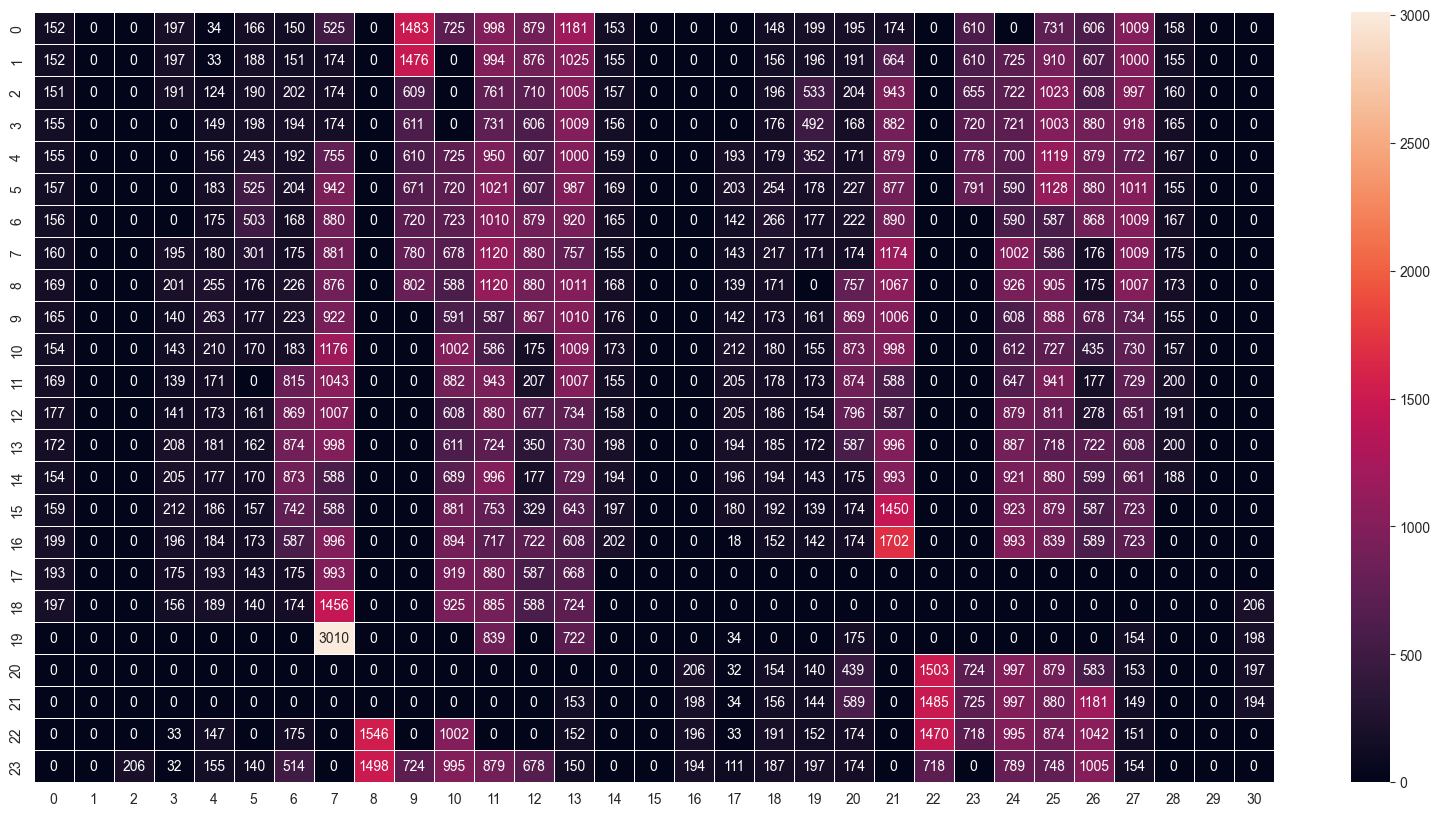

In [6]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(monthdata[:,0:31],annot=True, fmt='d', linewidth=0.5, )
plt.show()

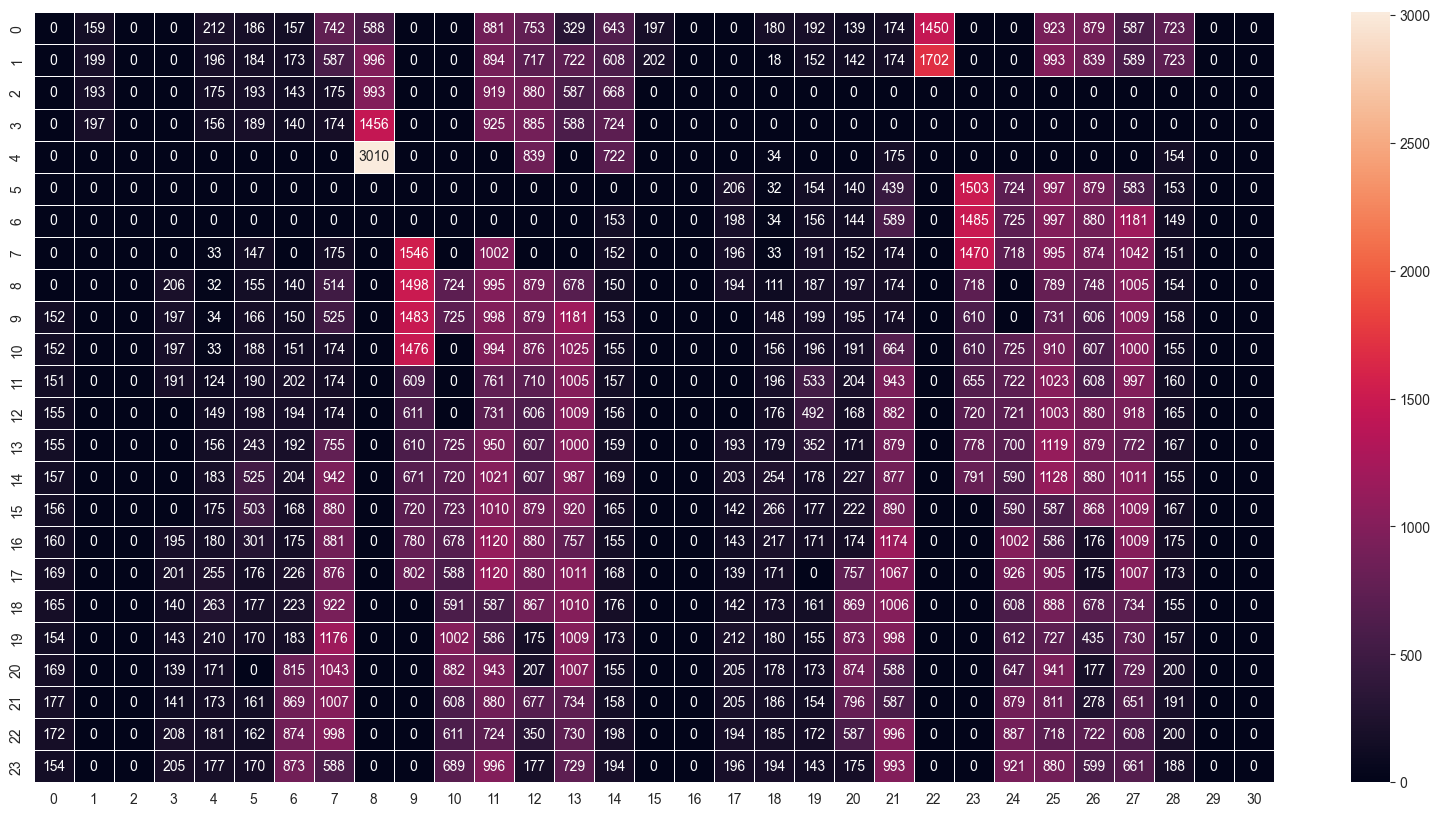

In [7]:
## timezone = 표준시 + 9 hour

monthdata = list2matrix(data["cycleIndex"].values, front=9)

plt.figure(figsize=(20,10))
ax = sns.heatmap(monthdata[:,0:31],annot=True, fmt='d', linewidth=0.5, )
plt.show()

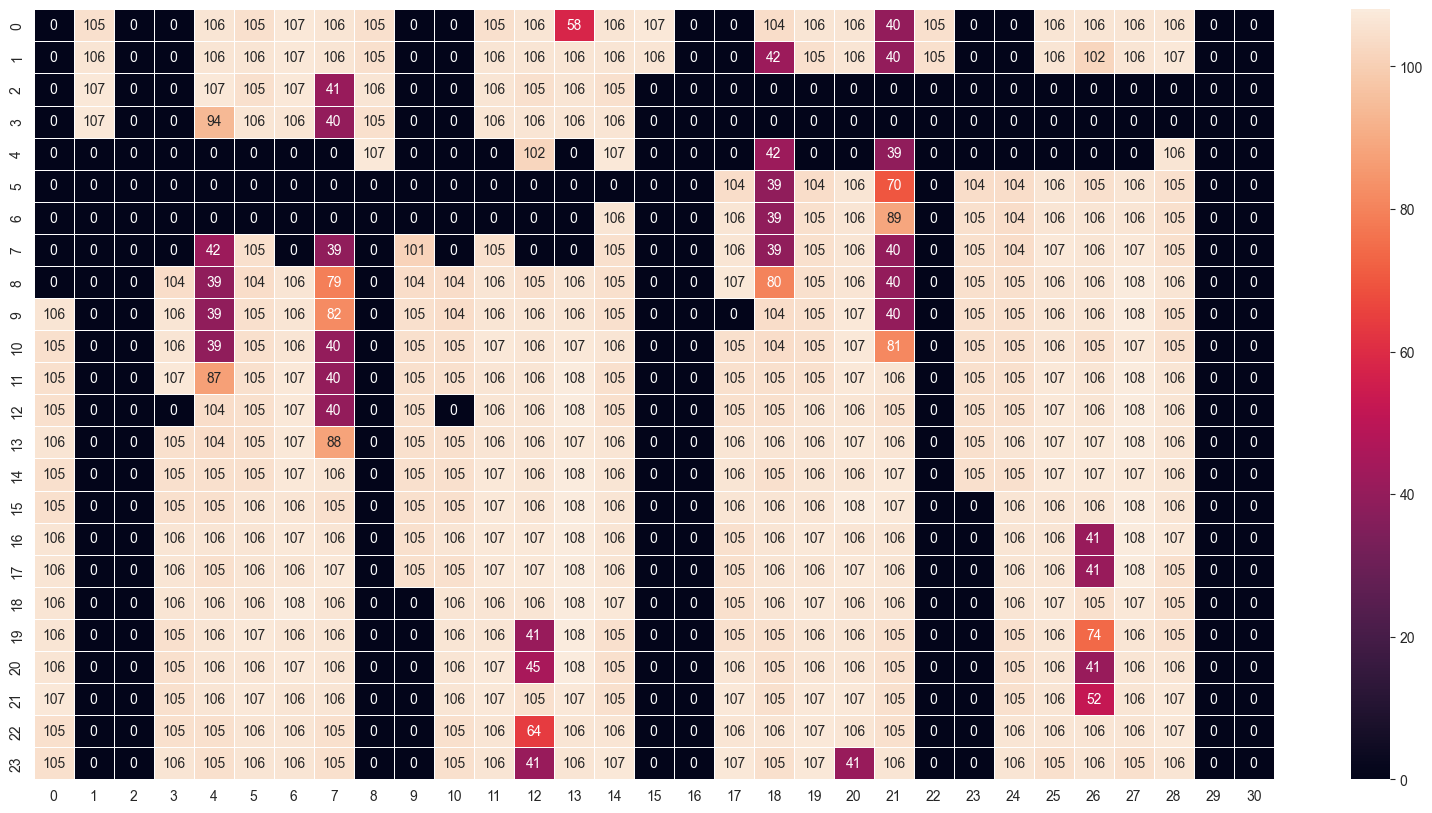

In [8]:
## 연속적인 필드 에 대한 데이터

monthdata = list2matrix(data["contiIndex"].values, front=9)

plt.figure(figsize=(20,10))
ax = sns.heatmap(monthdata[:,0:31],annot=True, fmt='d', linewidth=0.5, )
plt.show()

In [9]:
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(monthdata[:,0:31], x=list(range(1,32,1)), y=list(range(24)), annotation_text =monthdata[:,0:31], colorscale='Viridis', xgap=1, ygap=1)
fig.update_layout(margin = dict(t=2,r=2,b=2,l=2), width=1400, height=700, xaxis = dict( showgrid=False),yaxis = dict(autorange="reversed", showgrid=False), yaxis_title="Hour", xaxis_title="Day")
fig.data[0].hovertemplate =  "%{x}day %{y}hour  <extra></extra>"
fig.show()

In [12]:
percentage = 50.99

# 0은 예외 값으로 제거
cycleLimit = data["cycleIndex"].loc[ data["cycleIndex"] >0].quantile(percentage/100)
contiLimit = data["contiIndex"].loc[ data["contiIndex"] >0].quantile(percentage/100)

print("cycleLimit: ", cycleLimit)
# cycleLimit:  2899.212
print("contiLimit: ", contiLimit)
# contiLimit:  108.0

cycleLimit:  588.0
contiLimit:  106.0


In [138]:
data[(data['time']-datetime.date(2022,12,1)>datetime.timedelta(-31)) & (data['time']-datetime.date(2022,12,1)<=datetime.timedelta(0))]

model  cycleIndex  contiIndex        time
datetime                                                            
2022-11-01 00:00:00+00:00     42           0         105  2022-11-01
2022-11-01 01:00:00+00:00     42           0         106  2022-11-01
2022-11-01 02:00:00+00:00     78         193         106  2022-11-01
2022-11-01 03:00:00+00:00     78         202         106  2022-11-01
2022-11-01 04:00:00+00:00     76         155         106  2022-11-01
...                          ...         ...         ...         ...
2022-12-01 15:00:00+00:00      0           0           0  2022-12-01
2022-12-01 16:00:00+00:00      0           0           0  2022-12-01
2022-12-01 17:00:00+00:00      0           0           0  2022-12-01
2022-12-01 18:00:00+00:00      0           0           0  2022-12-01
2022-12-01 19:00:00+00:00     66         722         107  2022-12-01

[740 rows x 4 columns]

In [137]:
data['time']-datetime.date(2022,12,1)

datetime
2022-10-01 00:00:00+00:00   -61 days
2022-10-01 01:00:00+00:00   -61 days
2022-10-01 02:00:00+00:00   -61 days
2022-10-01 03:00:00+00:00   -61 days
2022-10-01 04:00:00+00:00   -61 days
                              ...   
2022-12-01 15:00:00+00:00     0 days
2022-12-01 16:00:00+00:00     0 days
2022-12-01 17:00:00+00:00     0 days
2022-12-01 18:00:00+00:00     0 days
2022-12-01 19:00:00+00:00     0 days
Name: time, Length: 1484, dtype: timedelta64[ns]

In [16]:
data["data"] = data["cycleIndex"]+data["contiIndex"]

In [17]:
data

model  cycleIndex  contiIndex  data
datetime                                                      
2022-10-01 00:00:00+00:00     96         152         106   258
2022-10-01 01:00:00+00:00     96         152         105   257
2022-10-01 02:00:00+00:00     89         151         105   256
2022-10-01 03:00:00+00:00     87         155         105   260
2022-10-01 04:00:00+00:00     87         155         106   261
...                          ...         ...         ...   ...
2022-12-01 15:00:00+00:00      0           0           0     0
2022-12-01 16:00:00+00:00      0           0           0     0
2022-12-01 17:00:00+00:00      0           0           0     0
2022-12-01 18:00:00+00:00      0           0           0     0
2022-12-01 19:00:00+00:00     66         722         107   829

[1484 rows x 4 columns]

In [29]:
d = data["contiIndex"] + data["cycleIndex"]

In [35]:
d[d>260] = 0

In [36]:
d

datetime
2022-10-01 00:00:00+00:00    258
2022-10-01 01:00:00+00:00    257
2022-10-01 02:00:00+00:00    256
2022-10-01 03:00:00+00:00    260
2022-10-01 04:00:00+00:00      0
                            ... 
2022-12-01 15:00:00+00:00      0
2022-12-01 16:00:00+00:00      0
2022-12-01 17:00:00+00:00      0
2022-12-01 18:00:00+00:00      0
2022-12-01 19:00:00+00:00      0
Length: 1484, dtype: int64

In [150]:
api_endpoint1 = 'https://kdwyu8tywb.execute-api.ap-northeast-2.amazonaws.com/default/cushion_report_api'
api_endpoint2 = 'https://c5nidsaeoh.execute-api.ap-northeast-2.amazonaws.com/default/ingkle-an2-api-base-swhitech'


# time_from 으로 부터 60분의 state와 model 데이터 가져옴
def operation(time_from):
    r = requests.get(api_endpoint2 + f'?type=op&time_from={time_from}&time_to={time_from + 60*60}')
    try:
        data = pd.DataFrame(r.json()["values"], columns = r.json()["fields"])
        return data
    except:
        print("데이터 다운로드 실패")

def rawdata(time_from, time_to):
    r = requests.get(api_endpoint1 + f'?type=raw_data&time_from={time_from}&time_to={time_to}')
    try:
        data = pd.DataFrame(r.json()["values"], columns = r.json()["fields"])
        return data
    except:
        return pd.DataFrame()
        print("데이터 다운로드 실패")

In [142]:
raw_data = rawdata(1670827154, 1670827174)
raw_data
columns = raw_data.columns

system_list = [x for x in columns if "force" in x]
# system_list = [x for x in columns if "position" in x]
# system_list = [x for x in columns if "servo" in x]

df = raw_data[system_list]
df

cushion 1 force  cushion 2 force  cushion 3 force  cushion 4 force  \
0               4.60           100.52           112.04             7.67   
1               5.37           100.52           112.04             7.29   
2               5.37           100.52           112.04             7.67   
3               5.37            99.76           112.04             7.67   
4               5.37            99.76           112.04             7.67   
..               ...              ...              ...              ...   
995             5.37            98.99           112.42             7.29   
996             4.99            98.99           112.42             7.29   
997             5.37            99.76           112.42             7.29   
998             5.37            99.76           112.42             7.29   
999             4.99            99.37           112.80             6.91   

     cushion 1 set force  cushion 2 set force  cushion 3 set force  \
0                  300.0                300.0                300.0   
1                  300.0                300.0                300.0   
2                  300.0                300.0                300.0   
3                  300.0                300.0                300.0   
4                  300.0                300.0                300.0   
..                   ...                  ...                  ...   
995                300.0                300.0                300.0   
996                300.0                300.0                300.0   
997                300.0                300.0                300.0   
998                300.0                300.0                300.0   
999                300.0                300.0                300.0   

     cushion 4 set force  
0                  300.0  
1                  300.0  
2                  300.0  
3                  300.0  
4                  300.0  
..                   ...  
995                300.0  
996                300.0  
997                300.0  
998                300.0  
999                300.0  

[1000 rows x 8 columns]

In [203]:
print(list(raw_data.columns).remove('timestamp'))

None


In [197]:
raw_data.drop(columns='timestamp')

slide angle  slide position  cushion 1 position  cushion 2 position  \
0         359.12          799.96              167.84              167.85   
1         359.12          799.96              167.84              167.85   
2         359.12          799.96              167.84              167.85   
3         359.12          799.96              167.84              167.85   
4         359.12          799.96              167.84              167.85   
..           ...             ...                 ...                 ...   
995       359.12          799.96              167.84              167.85   
996       359.12          799.96              167.84              167.85   
997       359.12          799.96              167.84              167.85   
998       359.12          799.96              167.84              167.85   
999       359.12          799.96              167.84              167.85   

     cushion 3 position  cushion 4 position  cushion 1 force  cushion 2 force  \
0                167.88               167.8             4.60           100.52   
1                167.88               167.8             5.37           100.52   
2                167.88               167.8             5.37           100.52   
3                167.88               167.8             5.37            99.76   
4                167.88               167.8             5.37            99.76   
..                  ...                 ...              ...              ...   
995              167.88               167.8             5.37            98.99   
996              167.88               167.8             4.99            98.99   
997              167.88               167.8             5.37            99.76   
998              167.88               167.8             5.37            99.76   
999              167.88               167.8             4.99            99.37   

     cushion 3 force  cushion 4 force  ...  cushion 4 pressure B  \
0             112.04             7.67  ...                6577.0   
1             112.04             7.29  ...                6582.0   
2             112.04             7.67  ...                6577.0   
3             112.04             7.67  ...                6572.0   
4             112.04             7.67  ...                6572.0   
..               ...              ...  ...                   ...   
995           112.42             7.29  ...                6587.0   
996           112.42             7.29  ...                6582.0   
997           112.42             7.29  ...                6582.0   
998           112.42             7.29  ...                6582.0   
999           112.80             6.91  ...                6577.0   

     cushion 1 servo output   cushion 1 servo feedback  \
0                      239.0                      39.0   
1                      239.0                      39.0   
2                      239.0                      39.0   
3                      239.0                      44.0   
4                      239.0                      44.0   
..                       ...                       ...   
995                    239.0                      39.0   
996                    239.0                      39.0   
997                    239.0                      39.0   
998                    239.0                      39.0   
999                    239.0                      39.0   

     cushion 2 servo output  cushion 2 servo feedback  cushion 3 servo output  \
0                     234.0                       5.0                   253.0   
1                     234.0                       5.0                   253.0   
2                     234.0                       0.0                   253.0   
3                     234.0                       0.0                   253.0   
4                     234.0                       0.0                   253.0   
..                      ...                       ...                     ...   
995                   234.0           

In [158]:
operation1 = operation(1670817154)

In [159]:
operation1

Empty DataFrame
Columns: [type, data, timestamp_from, timestamp_to]
Index: []

In [160]:
api_endpoint = 'https://kdwyu8tywb.execute-api.ap-northeast-2.amazonaws.com/default/cushion_report_api'

def operation(time_from, duration):
    r = requests.get(api_endpoint + f'?type=all&time_from={time_from-duration}&time_to={time_from}')
    try:
        data = pd.DataFrame(r.json()["values"], columns = r.json()["fields"])
        return data
    except:
        print("데이터 다운로드 실패")
        return False

In [179]:
operation2 = operation(1670817154, 60*60*24)

In [180]:
operation2

type  flag     time_from       time_to
0   state     0  1.670731e+09  1.670806e+09
1   state     2  1.670806e+09  1.670806e+09
2   state     0  1.670806e+09  1.670806e+09
3   state     1  1.670806e+09  1.670810e+09
4   state     0  1.670810e+09  1.670810e+09
5   state     2  1.670810e+09  1.670810e+09
6   state     1  1.670810e+09  1.670817e+09
7   model    52  1.670731e+09  1.670801e+09
8   model    53  1.670801e+09  1.670806e+09
9   model    52  1.670806e+09  1.670806e+09
10  model    56  1.670806e+09  1.670810e+09
11  model    87  1.670810e+09  1.670817e+09

In [178]:
import plotly.graph_objects as go

fig = go.Figure()

x_data = [[10 for x in range(60)] for y in range(3)]
y_data = ['운영', '모델', '건강도']

for i in range(len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
        ))

In [175]:
for xd, yd in zip(x_data, y_data):
    print(xd)
    print(yd)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
운영
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
모델
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
건강도


In [184]:
operation2['diff'] = operation2['time_to'] - operation2['time_from']
state_data = operation2[operation2['type'] == 'state']
model_data = operation2[operation2['type'] == 'model']

In [185]:
state_data

type  flag     time_from       time_to     diff
0  state     0  1.670731e+09  1.670806e+09  74572.4
1  state     2  1.670806e+09  1.670806e+09    152.8
2  state     0  1.670806e+09  1.670806e+09      0.1
3  state     1  1.670806e+09  1.670810e+09   4261.9
4  state     0  1.670810e+09  1.670810e+09      0.0
5  state     2  1.670810e+09  1.670810e+09    148.8
6  state     1  1.670810e+09  1.670817e+09   6818.0

In [193]:
for i, value in enumerate(state_data['diff']):
    print(i, value)
    print(state_data['flag'][i])

0 74572.40000009537
0
1 152.79999995231628
2
2 0.09999990463256836
0
3 4261.900000095367
1
4 0.0
0
5 148.79999995231628
2
6 6818.0
1


In [ ]:
def make_bar_chart1(timestamp=time.mktime(datetime.today().timetuple())):
    fig = go.Figure()

    operation_data = api_module.operation(timestamp)
    operation_data['diff'] = operation_data['time_to'] - operation_data['time_from']

    raw_data = api_module.rawdata(timestamp)

    state_data = operation_data[operation_data['type'] == 'state']
    model_data = operation_data[operation_data['type'] == 'model']

    health_color = {0: "black", 1: "cornsilk", 2: "aqua", 3: "lightseagreen", 4: "coral", 5: "teal"}
    model_color = {0: "black", 1: "cornsilk", 2: "aqua", 3: "lightseagreen", 4: "coral", 5: "teal"}
    run_color = {0: "black", 1: "cornsilk", 2: "aqua", 3: "lightseagreen", 4: "coral", 5: "teal"}

    color_dict = {'건강도': health_color, '모델': model_color, '운영': run_color}
    color_data = [[0 for x in range(60)] for y in range(3)]

    x_data = [[0 for x in range(60)] for y in range(3)]
    y_data = ['건강도', '모델', '운영']

    for i, value in enumerate(state_data['diff']):
        x_data[2][i] = value//60
        color_data[2][i] = state_data['flag']

    for i, value in enumerate(model_data['diff']):
        x_data[1][i] = value//60
        color_data[1][i] = model_data['flag']

    for i in range(len(x_data[0])):
        for xd, yd in zip(x_data, y_data):
            fig.add_trace(go.Bar(
                x=[xd[i]], y=[yd],
                orientation='h',
                color=color_dict[yd][]
            ))


    fig_layout()

    return fig